# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# Preparing the Data

In [2]:
df = pd.read_csv('data1.csv', sep = ';')

In [3]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [4]:
df.shape

(3333, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [6]:
df = df.drop(['add to cart per session','location code','account length',
       'add to wishlist', 'app sessions',
       'desktop transactions', 'total product detail views', 'promotion clicks',
        'discount rate per visited products'], axis = 1)

In [7]:
### Dropping cols above because after getting model peformance above cols aren't contributing to the model perfomance.

In [8]:
# df['location code'].unique()

In [9]:
# df['location code'] = df['location code'].astype(str)

In [10]:
# df['credit card info save'].unique()

In [11]:
df['credit card info save'] = df['credit card info save'].replace({'yes' : 1, 'no' : 0})

In [12]:
df['push status'] = df['push status'].replace({'yes' : 1, 'no' : 0})

In [13]:
df['avg order value'] = df['avg order value'].str.replace(',','.').astype(float)
# df['discount rate per visited products'] = df['discount rate per visited products'].str.replace(',','.').astype(float)
df['product detail view per app session'] = df['product detail view per app session'].str.replace(',','.').astype(float)
# df['add to cart per session'] = df['add to cart per session'].str.replace(',','.').astype(float)

In [14]:
# df = pd.get_dummies(df, columns = ['location code'])
df = df.drop('user id', axis = 1)
df.head()

,credit card info save,push status,desktop sessions,session duration,avg order value,sale product views,product detail view per app session,app transactions,customer service calls,churn
0,0,1,265,197,244.7,91,10.0,3,1,0
1,0,1,162,196,254.4,103,13.7,3,1,0
2,0,0,243,121,162.6,104,12.2,5,0,0
3,1,0,299,62,196.9,89,6.6,7,2,0
4,1,0,167,148,186.9,121,10.1,3,3,0


In [15]:
df.columns

Index(['credit card info save', 'push status', 'desktop sessions',
       'session duration', 'avg order value', 'sale product views',
       'product detail view per app session', 'app transactions',
       'customer service calls', 'churn'],
      dtype='object')

In [16]:
cols_to_scale = [
       'desktop sessions',
       'session duration', 'avg order value',
       'sale product views',
       'product detail view per app session', 'app transactions',
        'customer service calls']



scaler = Normalizer()
scale_data = scaler.fit_transform(df[cols_to_scale])
scaled_df = pd.DataFrame(scale_data, index = df.index, columns = cols_to_scale)

In [17]:
scaled_df.head()

,desktop sessions,session duration,avg order value,sale product views,product detail view per app session,app transactions,customer service calls
0,0.629343,0.467852,0.581133,0.216114,0.023749,0.007125,0.002375
1,0.432676,0.523484,0.679461,0.275096,0.036590,0.008013,0.002671
2,0.728975,0.362988,0.487784,0.311989,0.036599,0.014999,0.000000
3,0.799019,0.165683,0.526177,0.237835,0.017637,0.018706,0.005345
4,0.529464,0.469225,0.592556,0.383624,0.032021,0.009511,0.009511


In [18]:
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [19]:
### The churn is having around 6:1 ration of non-churn to churn ratio, which shows the data is highly imbalanced 

In [20]:
# df = df.drop(cols_to_scale, axis = 1)
# df = pd.merge(df, scaled_df, right_index = True, left_index = True)

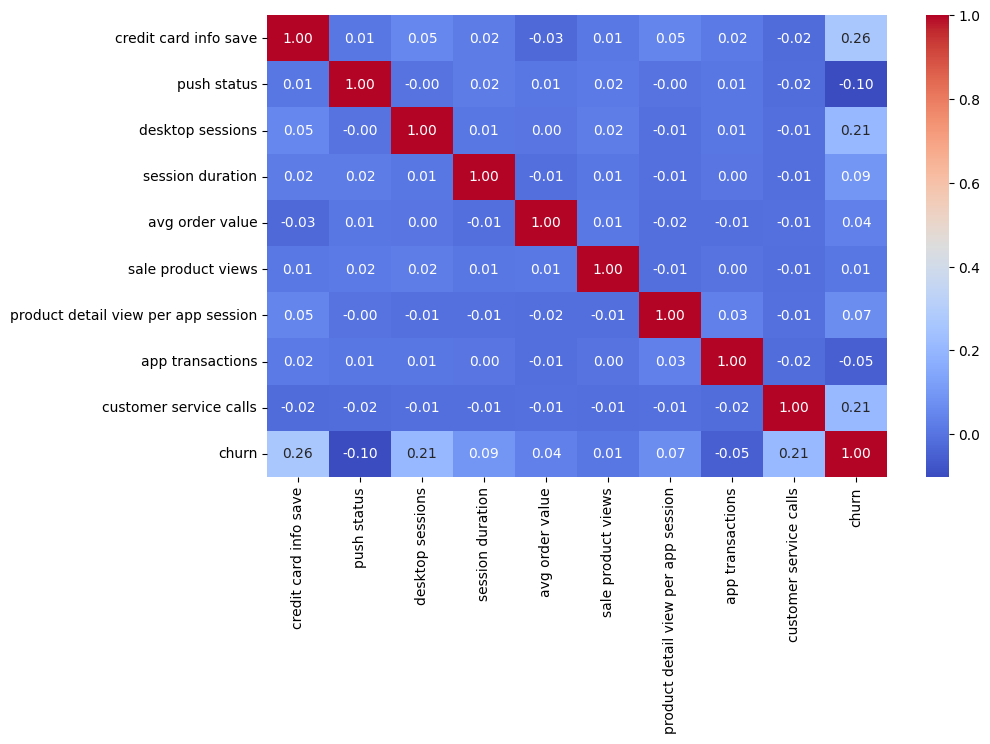

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

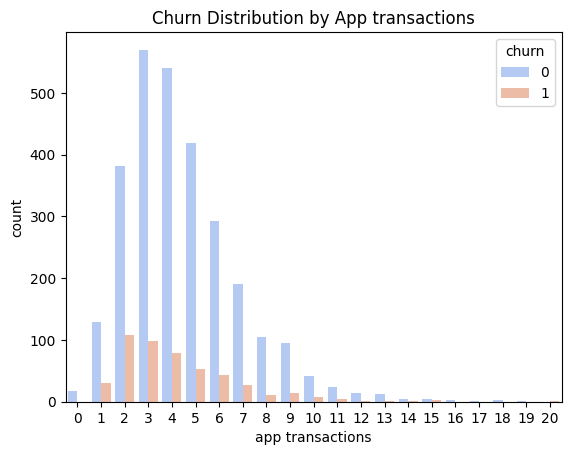

In [22]:
sns.countplot(data=df, x="app transactions", hue="churn", palette="coolwarm")
plt.title("Churn Distribution by App transactions")
plt.show()

# Train Test Split

In [23]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2499, 9) (834, 9) (2499,) (834,)


# Building Model

### 1. SVM

In [25]:
svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print('SVM Accuracy :', acc_svm)
print('F1_score :', f1_svm )

SVM Accuracy : 0.8501199040767387
F1_score : 0.0


### 2. KNN

In [26]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print('KNN Accuracy :', acc_knn)
print('F1_score :', f1_knn)

KNN Accuracy : 0.8633093525179856
F1_score : 0.3804347826086957


### 3. Random Forest

In [27]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('Random Forest Accuracy :', acc_rf)
print('F1_score :', f1_rf)

Random Forest Accuracy : 0.9496402877697842
F1_score : 0.8073394495412844


### 4. XGB

In [28]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
y_pred_xgb = xgb_cl.predict(X_test)

In [29]:
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('XGB Accuracy :', acc_xgb)
print('F1_score :', f1_xgb)

XGB Accuracy : 0.9460431654676259
F1_score : 0.8


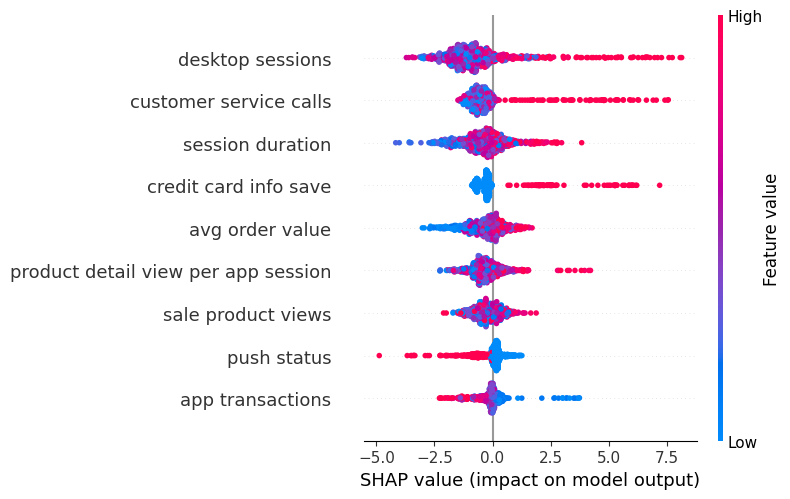

In [30]:
import shap

explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

### Compairing the results we got above

In [31]:
model_comparison = {'Model' : ['SVM', 'KNN', 'Random Forest', 'XGBoost'],
                    'Accuracy' : [acc_svm, acc_knn, acc_rf, acc_xgb]}

Acc_data = pd.DataFrame(model_comparison)
Acc_data

,Model,Accuracy
0,SVM,0.850120
1,KNN,0.863309
2,Random Forest,0.949640
3,XGBoost,0.946043


##### Above table shows that XGBoost has given most accurate predictions

# Hyperparameter tunning

In [32]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators' : [200, 300, 500],
    'max_depth' : [4,5,6],
    'learning_rate' : [0.05, 0.1],
    'gamma' : [0.1,0.2,0.3,0.5],
    'scale_pos_weights' : [0],
    'subsample' : [1],
    'colsample_bytree' : [1]
}

xgb_cl2 = xgb.XGBClassifier(objective = 'binary:logistic')
grid_cv = GridSearchCV(xgb_cl2, param_grid, n_jobs = -1, cv = 3, scoring = 'roc_auc')
_ = grid_cv.fit(X_train, y_train)
print("The best score :", grid_cv.best_score_)
print("The best parameters :", grid_cv.best_params_)

The best score : 0.9119687684770579
The best parameters : {'colsample_bytree': 1, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'scale_pos_weights': 0, 'subsample': 1}


In [33]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_, objective = 'binary:logistic'
)
grid_final = final_cl.fit(X_train, y_train)
y_pred2 = final_cl.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print('The accuracy of final model is :', round(acc2, 2))

The accuracy of final model is : 0.95


In [34]:
import joblib
joblib.dump(final_cl, 'churn_pred_cl.pkl')

['churn_pred_cl.pkl']